In [ ]:
import pandas as pd
df_vente = pd.read_csv('ventes.csv')

In [5]:
df_vente = pd.get_dummies(df_vente, columns=['Property Type', 'Governorate', 'Location'])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
X_vente = df_vente.drop(columns=['Price'])  
y_vente = df_vente['Price']  

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_vente, y_vente, test_size=0.2, random_state=42)

In [8]:
model_vente = DecisionTreeRegressor(random_state=42)
model_vente.fit(X_train, y_train)
print("hello")

hello


In [9]:
y_pred_vente = model_vente.predict(X_test)


In [10]:
print (y_pred_vente)

[ 580000.          395000.          854000.          280000.
 1600000.          650000.          219000.          950000.
  235000.         1300000.          310000.          600000.
  249000.         1200000.          370000.         1050000.
  980000.         1100000.          980000.          230000.
  382180.          419500.          320000.          479000.
 1050000.          650000.          300000.          470000.
 3000000.          800000.          315000.          780000.
 1600000.          150000.          320000.          750000.
  800000.          370000.          750000.          260000.
 1200000.          330000.          285000.          240000.
  149997.          980000.           85000.          350000.
 1000000.          280000.          400000.          280333.33333333
  689999.5         317250.          220000.          240000.
  630000.          540000.          980000.          320000.
  175000.          780000.          230000.          350000.
 1480000.       

In [11]:
mae = mean_absolute_error(y_test, y_pred_vente)
r2 = r2_score(y_test, y_pred_vente)

In [12]:
print("Évaluation du modèle sur les données de vente:")
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Évaluation du modèle sur les données de vente:
Mean Absolute Error: 239566.40889252594
R² Score: 0.21184023434707466


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = r"locations.csv"
data = pd.read_csv(file_path)

# Feature Engineering
# Room-to-Bathroom Ratio
data['Room_to_Bathroom_Ratio'] = data['Bedrooms'] / data['Bathrooms']
data['Room_to_Bathroom_Ratio'] = data['Room_to_Bathroom_Ratio'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Room_to_Bathroom_Ratio'])

# Price per square meter
data['Price_per_m2'] = data['Price'] / data['Area (m²)']

# Handle outliers using IQR
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
outliers = (data['Price'] < (q1 - 1.5 * iqr)) | (data['Price'] > (q3 + 1.5 * iqr))
data = data[~outliers]

# Scale numeric features
numeric_features = ['Area (m²)', 'Price_per_m2', 'Room_to_Bathroom_Ratio']
scaler = MinMaxScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encode categorical features
label_encoder = LabelEncoder()
data['Property Type'] = label_encoder.fit_transform(data['Property Type'])
data['Governorate'] = label_encoder.fit_transform(data['Governorate'])
data['Location'] = label_encoder.fit_transform(data['Location'])

# Define Features and Target
X = data.drop(columns=['Price'])
y = data['Price']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 5, 10, 15],          
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],           
    'max_features': [None, 'sqrt', 'log2']   
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 39.49
Mean Squared Error (MSE): 12727.58
Root Mean Squared Error (RMSE): 112.82
R² Score: 0.9715


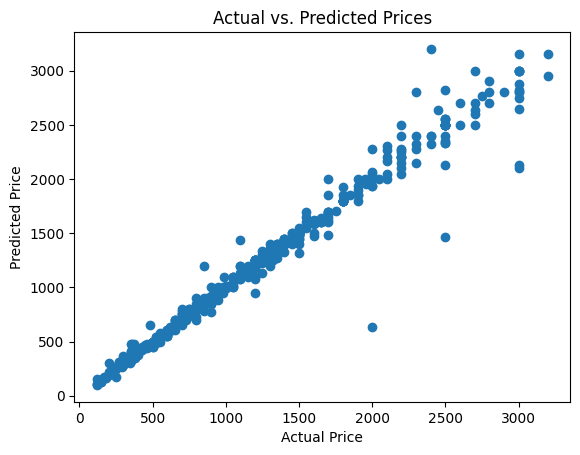

In [3]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()

In [ ]:
# Single example to test
new_sample = pd.DataFrame({
    'Bedrooms': [2],
    'Bathrooms': [1],
    'Area (m²)': [100],
    'Property Type': 'Appartement',
    'Governorate': ['Tunis'],
    'Location': ['La Marsa']
})


new_sample['Room_to_Bathroom_Ratio'] = new_sample['Bedrooms'] / new_sample['Bathrooms']

# Calculate Price per square meter 
new_sample['Price_per_m2'] = 0  

def safe_transform(label_encoder, value):
    if value in label_encoder.classes_:
        return label_encoder.transform([value])[0]
    else:
        return -1  

# Apply safe_transform for categorical encoding
new_sample['Property Type'] = new_sample['Property Type'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Governorate'] = new_sample['Governorate'].apply(lambda x: safe_transform(label_encoder, x))
new_sample['Location'] = new_sample['Location'].apply(lambda x: safe_transform(label_encoder, x))

# Scale numeric features
new_sample[numeric_features] = scaler.transform(new_sample[numeric_features])

new_sample = new_sample[X.columns]
# Predict the price
predicted_price = best_model.predict(new_sample)
print(f"Predicted Price: {predicted_price[0]:.2f}")


Predicted Price: 100.00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

file_path = r"locations_updated.csv"
data = pd.read_csv(file_path)

# Feature Engineering
data['Room_to_Bathroom_Ratio'] = data['Bedrooms'] / data['Bathrooms']
data['Room_to_Bathroom_Ratio'] = data['Room_to_Bathroom_Ratio'].replace([np.inf, -np.inf], np.nan)
data = data.dropna(subset=['Room_to_Bathroom_Ratio'])

# Price per square meter
data['Price_per_m2'] = data['Price'] / data['Area (m²)']

q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
outliers = (data['Price'] < (q1 - 1.5 * iqr)) | (data['Price'] > (q3 + 1.5 * iqr))
data = data[~outliers]

# Encode categorical features
label_encoder = LabelEncoder()
data['Property Type'] = label_encoder.fit_transform(data['Property Type'])
data['Governorate'] = label_encoder.fit_transform(data['Governorate'])
data['Location'] = label_encoder.fit_transform(data['Location'])

X = data.drop(columns=['Price'])
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning for DecisionTreeRegressor
param_grid = {
    'max_depth': [None, 5, 10, 15],          
    'min_samples_split': [2, 5, 10],        
    'min_samples_leaf': [1, 2, 4],          
    'max_features': [None, 'sqrt', 'log2']   
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance Metrics:
Mean Absolute Error (MAE): 39.34
Mean Squared Error (MSE): 11039.19
Root Mean Squared Error (RMSE): 105.07
R² Score: 0.9717


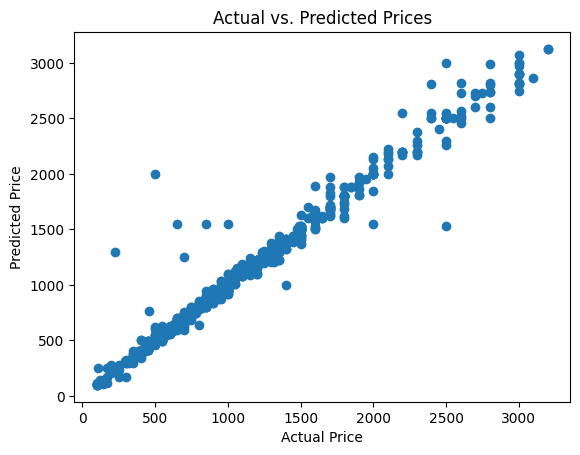

In [4]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()